[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cyneuro/Neural-Networks-Machine-Learning/blob/master/Linear-Regression/LinearRegressionNumpy.ipynb)

## Linear Regression using only Numpy
#### By Gregory Glickert
### Linear Regression is a simple model and while there are many packages that will fit the regression for you. Doing it your self is not that complex. There are actually two ways to solve it. One using what I would call tradional math and the other your matrix theory. We first will generate some data

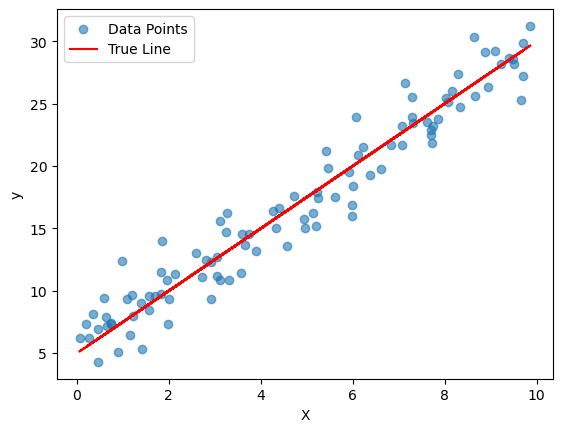

Data was generated using slope 2.5 and intercept 5 with a bit of noise


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate some example data
n_samples = 100
X = np.random.uniform(0, 10, n_samples)  # Independent variable
true_slope = 2.5
true_intercept = 5
noise = np.random.normal(0, 2, n_samples)  # Random noise

# Dependent variable (y)
y = true_slope * X + true_intercept + noise

#plot our data
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, true_slope * X + true_intercept, color='red', label="True Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
print(f"Data was generated using slope {true_slope} and intercept {true_intercept} with a bit of noise")

## Linear Regression formula using tradional math 

The linear regression equation is:

$$
y = mx + b
$$

Where:
- \( y \): The dependent variable (predicted value)
- \( x \): The independent variable
- \( m \): The slope of the line, calculated as:
  $$
  m = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}
  $$
- \( b \): The intercept of the line, calculated as:
  $$
  b = \bar{y} - m \cdot \bar{x}
  $$

### Steps to Compute \( m \) and \( b \)

1. Compute the mean of \( x \) and \( y \):
   $$
   \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i, \quad \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
   $$

2. Compute the slope (\( m \)):
   $$
   m = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}
   $$

3. Compute the intercept (\( b \)):
   $$
   b = \bar{y} - m \cdot \bar{x}
   $$

4. Use the regression equation to make predictions:
   $$
   \hat{y} = m \cdot x + b
   $$


Slope (m): 2.41, Intercept (b): 5.43


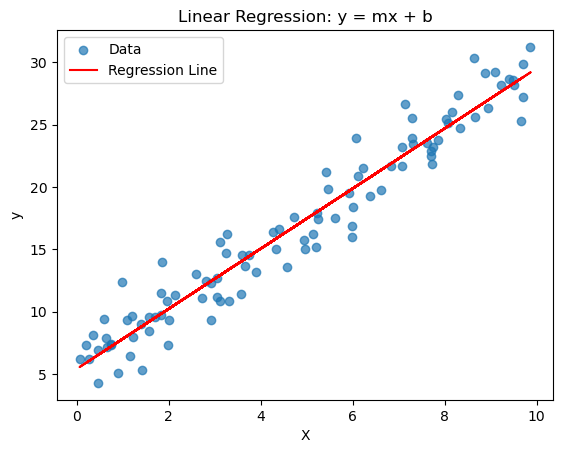

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate the means of X and y
X_mean = np.mean(X)
y_mean = np.mean(y)

# Step 2: Compute the slope (m)
numerator = np.sum((X - X_mean) * (y - y_mean))  # Covariance between X and y
denominator = np.sum((X - X_mean) ** 2)  # Variance of X
m = numerator / denominator  # Slope

# Step 3: Compute the intercept (b)
b = y_mean - m * X_mean  # Intercept

print(f"Slope (m): {m:.2f}, Intercept (b): {b:.2f}")

# Step 4: Predict values for y using the regression equation y = mx + b
y_pred = m * X + b

# Step 5: Plot the original data and the regression line
plt.scatter(X, y, label="Data", alpha=0.7)
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: y = mx + b")
plt.legend()
plt.show()


## Linear Regression Using Matrix Form
### This matrix form is much more efficient when it comes to large datasets and or datasets with many features $X$

In matrix form, the equation for linear regression is:

$$
\boldsymbol{y} = \boldsymbol{X} \boldsymbol{\beta}
$$

Where:
- $y$: An $n \times 1$ column vector of observed values.
- $p$ represents the number of features (or predictors) in the dataset, excluding the intercept.
- $X$: An $n \times (p+1)$ design matrix where each row represents a data point, and columns represent the features. The first column is typically all ones to account for the intercept.
- $\boldsymbol{\beta}$: A $(p+1) \times 1$ column vector of regression coefficients (including the intercept).

The **normal equation** is used to calculate the optimal $\boldsymbol{\beta}$:

$$
\boldsymbol{\beta} = (\boldsymbol{X}^\top \boldsymbol{X})^{-1} \boldsymbol{X}^\top \boldsymbol{y}
$$

### Steps to Perform Linear Regression

1. **Formulate the Design Matrix ($X$):**
   - The first column of $X$ consists of ones (for the intercept).
   - The remaining columns are the feature values.

2. **Calculate $\boldsymbol{\beta}$:**
   - Compute $\boldsymbol{X}^\top \boldsymbol{X}$, the matrix product of $\boldsymbol{X}$ transposed and $\boldsymbol{X}$.
   - Compute $(\boldsymbol{X}^\top \boldsymbol{X})^{-1}$, the inverse of $\boldsymbol{X}^\top \boldsymbol{X}$.
   - Multiply the result by $\boldsymbol{X}^\top \boldsymbol{y}$ to get $\boldsymbol{\beta}$.

3. **Predict $\boldsymbol{\hat{y}}$:**
   - Use $\boldsymbol{\hat{y}} = \boldsymbol{X} \boldsymbol{\beta}$, where $\boldsymbol{\hat{y}}$ is the predicted value.

### Assumptions
- The relationship between $X$ and $y$ is linear.
- The error terms are normally distributed with mean zero and constant variance.


Intercept: 5.43, Slope: 2.41


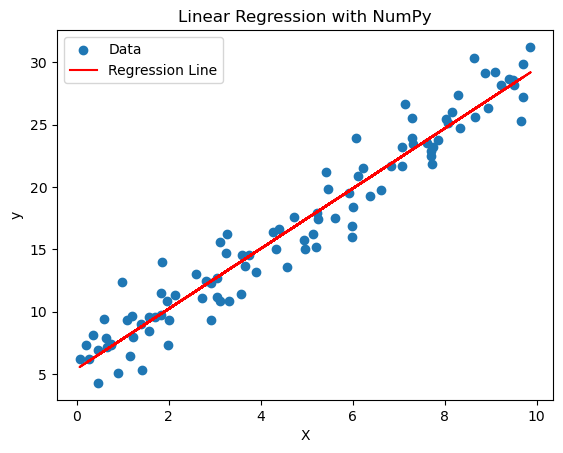

In [4]:
# Reshape X for matrix operations
X = X.reshape(-1, 1)

# Add a column of ones to X for the intercept term see step 1
X_b = np.hstack([np.ones_like(X), X])  # [1, x]

# Compute the coefficients using the Normal Equation with some fancy matrix stuff 
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Extract intercept and slope
intercept, slope = theta

print(f"Intercept: {intercept:.2f}, Slope: {slope:.2f}")

# Predict values
y_pred = X_b @ theta

# Plot the data and regression line
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with NumPy")
plt.legend()
plt.show()